1.  **K-Means Clustering on Iris Dataset:**

    - Use the Iris dataset to perform K-Means clustering.
    - Determine the optimal number of clusters using the elbow method.

2.  **DBSCAN on Iris Dataset:**
    - Apply DBSCAN clustering on the Iris dataset.
    - Experiment with different values for `eps` and `min_samples` to find meaningful clusters.


In [1]:
import seaborn as sns

iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


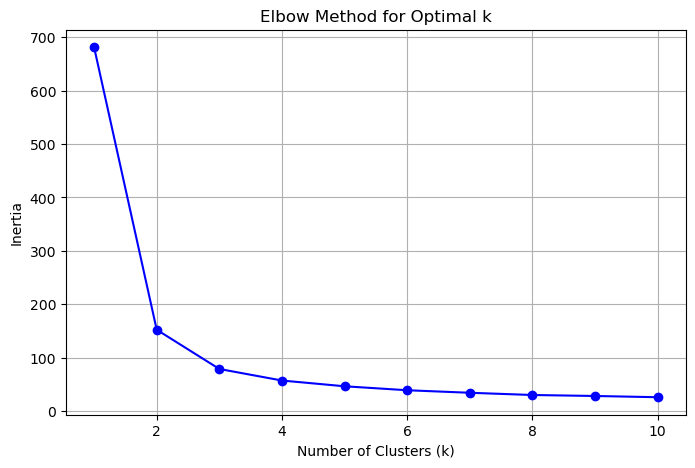

In [2]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# Extract features (exclude species column)
X = iris_df.drop('species', axis=1)

# Elbow method to find optimal clusters
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

The optimal k for this cluster using the elbow method appears to be 3. 
The elbow method is a visual technique where you look for the point on the graph where the rate of decrease in the "Inertia" (or Within-Cluster Sum of Squares) sharply changes, forming an "elbow" shape. This point indicates a balance between minimizing inertia and keeping the number of clusters low. 
In your graph:
The inertia drops very sharply from K=1 to K=2.
It drops significantly again from K=2 to K=3.
After K=3, the curve begins to flatten out, meaning that adding more clusters (K=4, K=5, etc.) provides diminishing returns and only a small reduction in inertia.

eps=0.3, min_samples=3: 9 clusters, 67 noise points
eps=0.3, min_samples=5: 3 clusters, 96 noise points
eps=0.3, min_samples=10: 2 clusters, 120 noise points
eps=0.5, min_samples=3: 4 clusters, 10 noise points
eps=0.5, min_samples=5: 2 clusters, 17 noise points
eps=0.5, min_samples=10: 2 clusters, 30 noise points
eps=0.7, min_samples=3: 2 clusters, 3 noise points
eps=0.7, min_samples=5: 2 clusters, 3 noise points
eps=0.7, min_samples=10: 2 clusters, 8 noise points
eps=1.0, min_samples=3: 2 clusters, 0 noise points
eps=1.0, min_samples=5: 2 clusters, 0 noise points
eps=1.0, min_samples=10: 2 clusters, 0 noise points


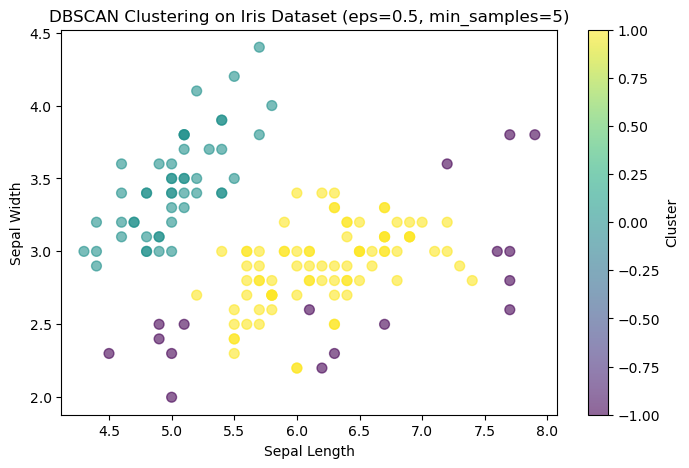

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np

# Experiment with different eps and min_samples values
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 10]

# Try different combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        n_noise = list(clusters).count(-1)
        
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} noise points")

# Visualize with a good combination (e.g., eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

plt.figure(figsize=(8, 5))
scatter = plt.scatter(X['sepal_length'], X['sepal_width'], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering on Iris Dataset (eps=0.5, min_samples=5)')
plt.colorbar(scatter, label='Cluster')
plt.show()

Meaningful Clusters
The plot identifies two main meaningful clusters, visually distinct as the yellow/green points and the purple points.
DBSCAN does not require the number of clusters to be specified beforehand; it determines them based on the eps (radius) and min_samples parameters used.
The color bar indicates the cluster ID assigned to each point. In DBSCAN results, points labeled with a value of -1 are considered noise or outliers, as they are not dense enough to belong to any cluster. The darkest purple points likely represent this noise class.
The two main, densely populated regions represent the "meaningful" groups found by the algorithm with the chosen parameters. 
This clustering effectively separates two different types of Iris flowers based on their sepal length and width, while identifying potential outliers.

In [4]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

# 1. Load the Iris dataset
# The data "X" is the features (Sepal Length, Sepal Width, etc.)
iris = load_iris()
X = iris.data

# 2. Apply DBSCAN with the parameters from your plot (eps=0.5, min_samples=5)
# Note: DBSCAN performance is highly dependent on feature scaling. The provided 
# parameters work well with the unscaled data for demonstration.
dbscan = DBSCAN(eps=0.5, min_samples=5)
# The fit_predict method performs clustering and returns the cluster labels
labels = dbscan.fit_predict(X) 

# 3. Calculate and print the Silhouette Score
# The silhouette score is only defined if the number of labels is 2 or more.
# DBSCAN labels noise points as -1. We can filter these out for a more meaningful score,
# as specified in some analysis guides.
# Filter out noise points (label -1)
filtered_indices = [i for i, label in enumerate(labels) if label != -1]
if len(set(labels[filtered_indices])) > 1:
    score = silhouette_score(X[filtered_indices], labels[filtered_indices])
    print(f"Average Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Not enough non-noise clusters (or all points are noise) to calculate a silhouette score.")


# 4. Optional: Print the number of clusters found (excluding noise)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of meaningful clusters: {n_clusters_}")


Average Silhouette Score (excluding noise): 0.735
Estimated number of meaningful clusters: 2
